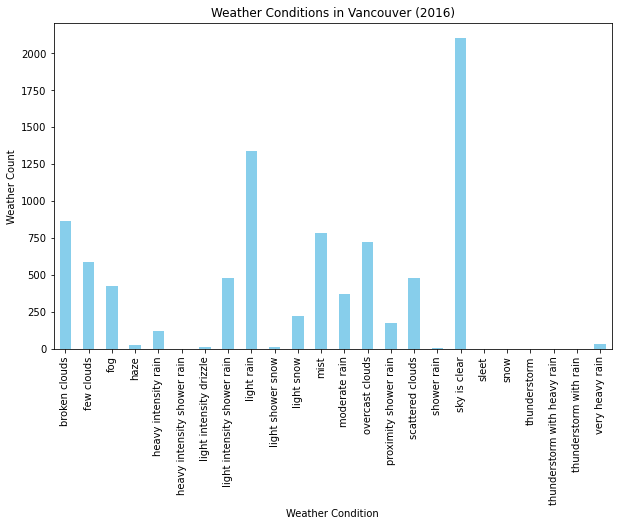

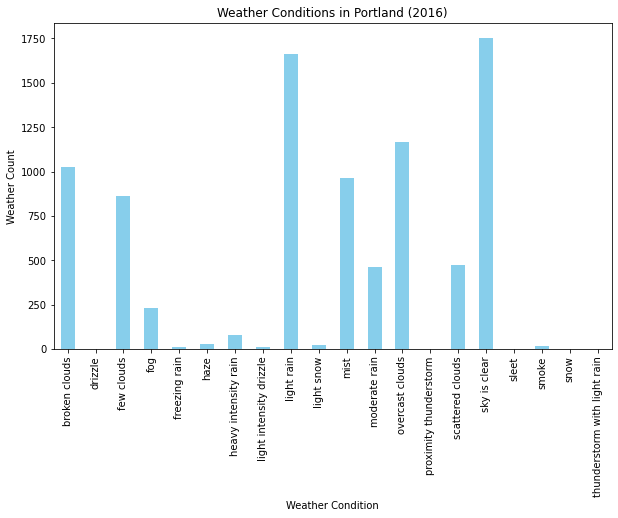

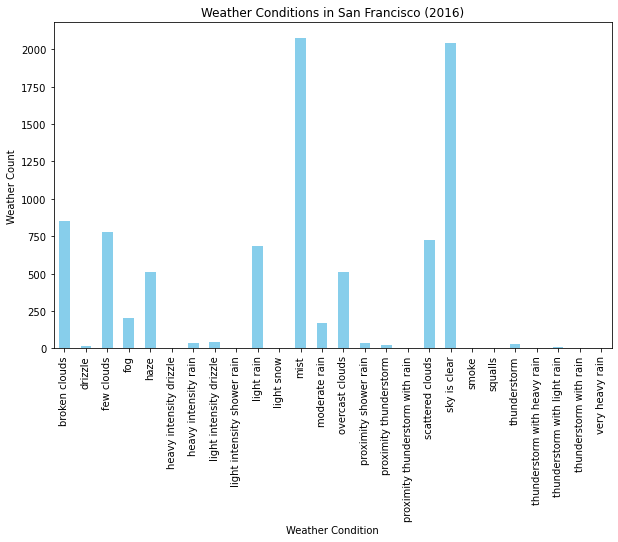

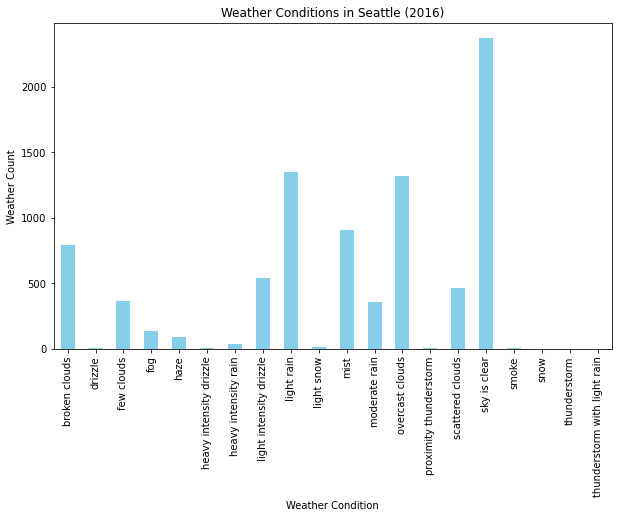

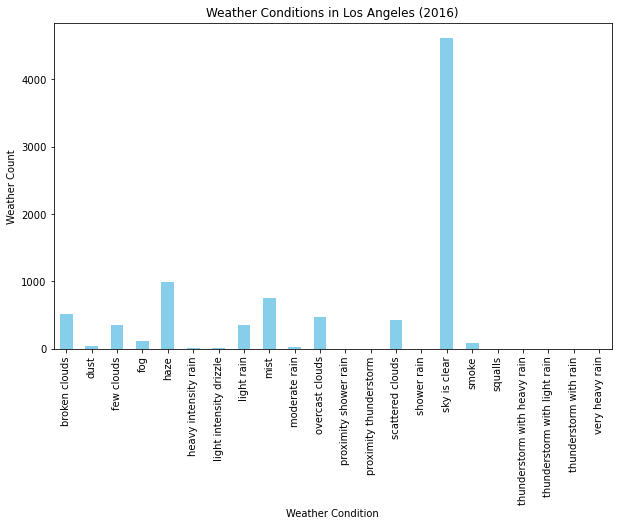

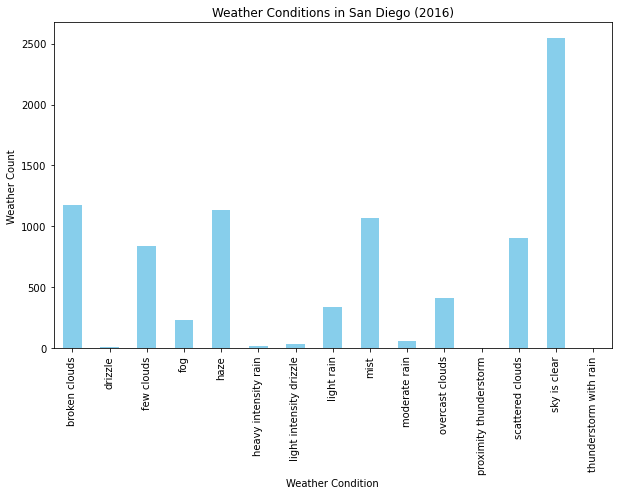

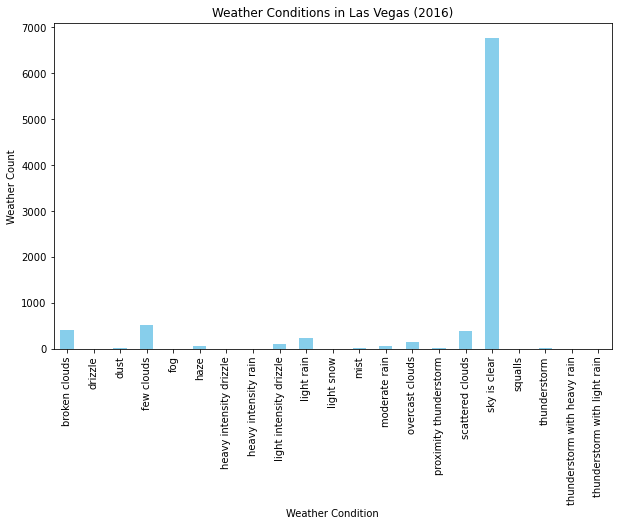

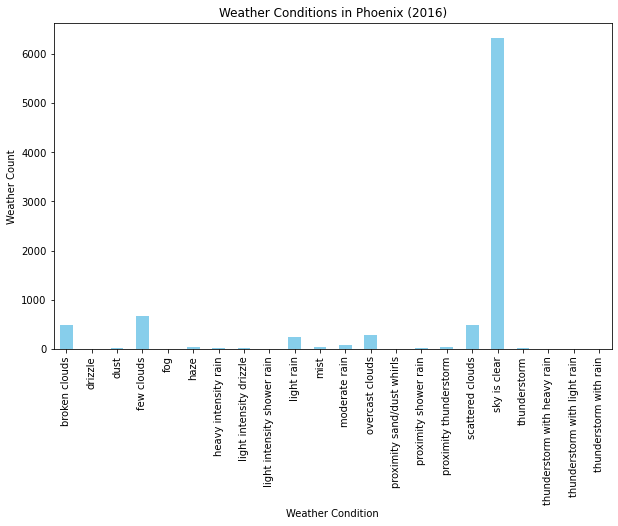

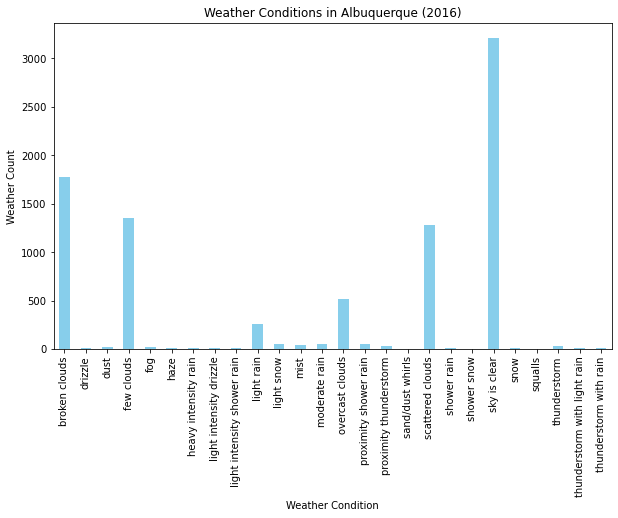

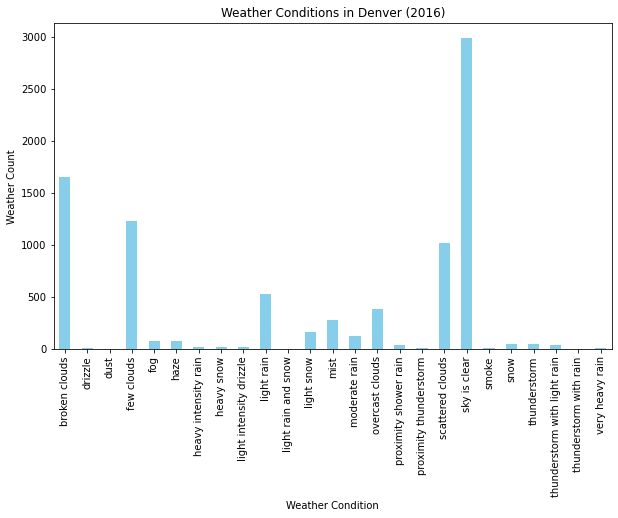

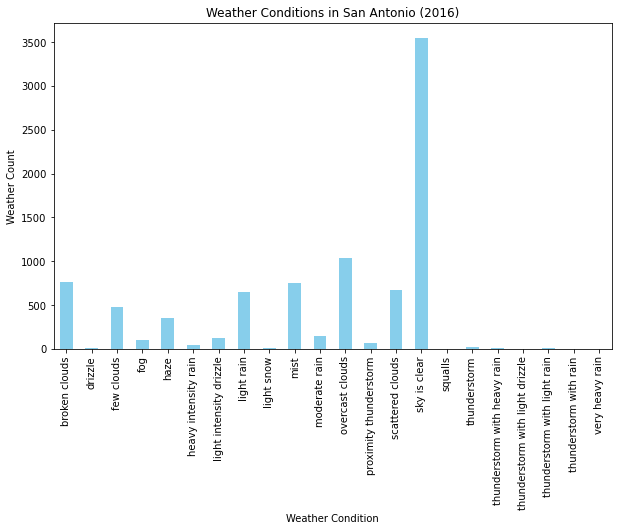

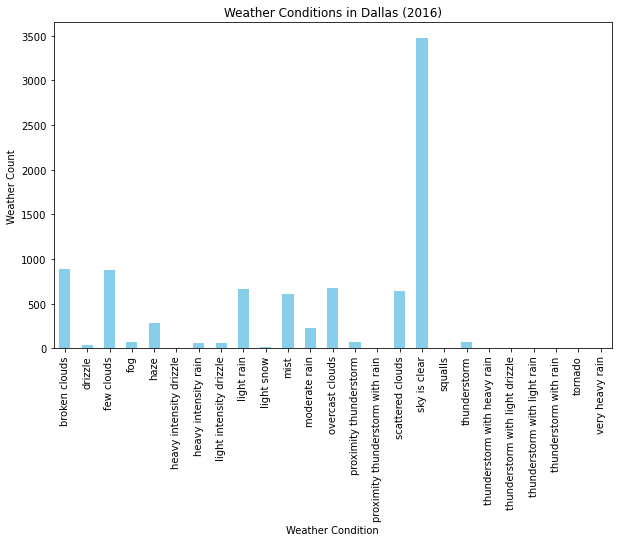

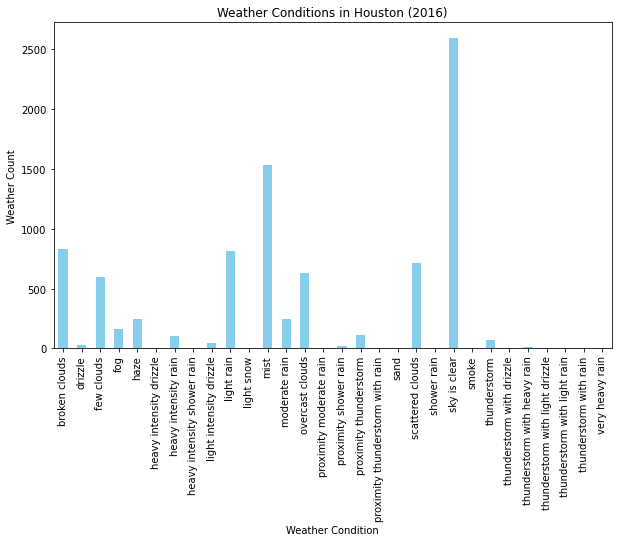

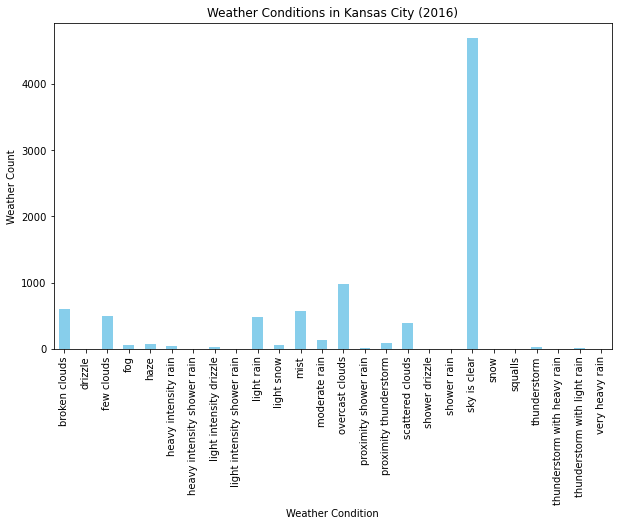

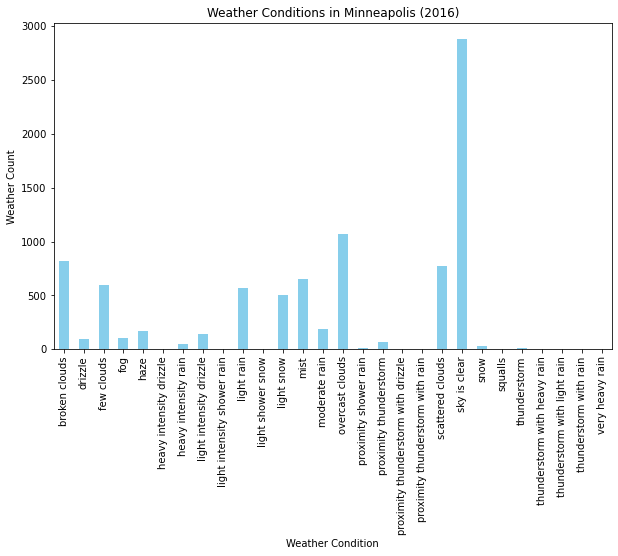

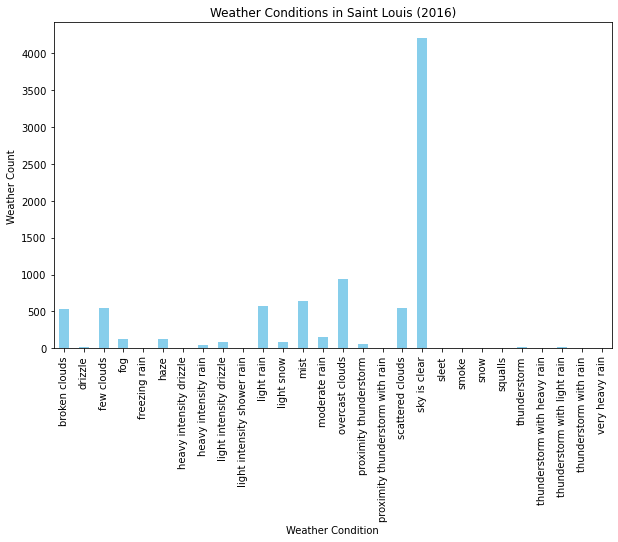

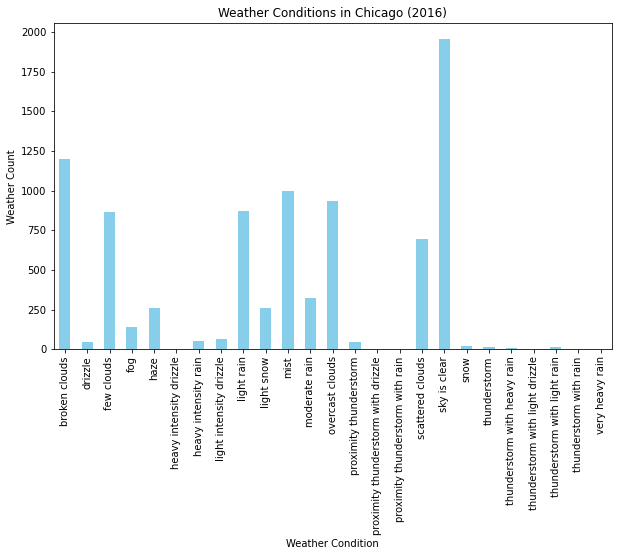

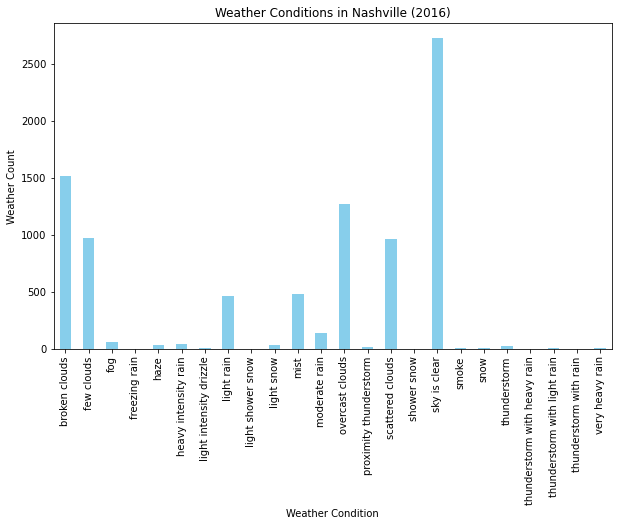

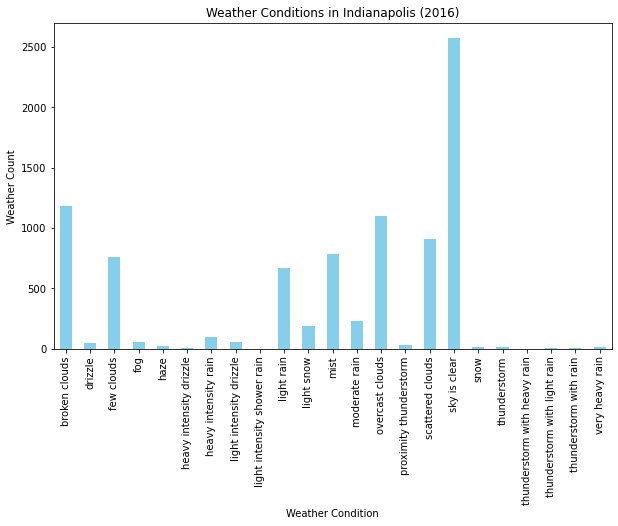

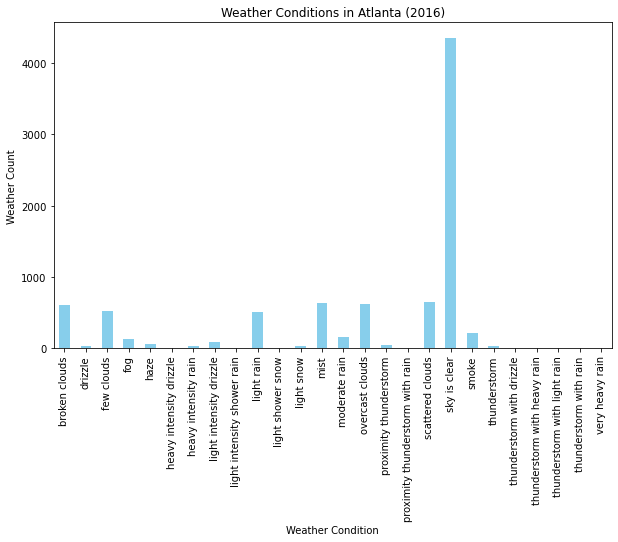

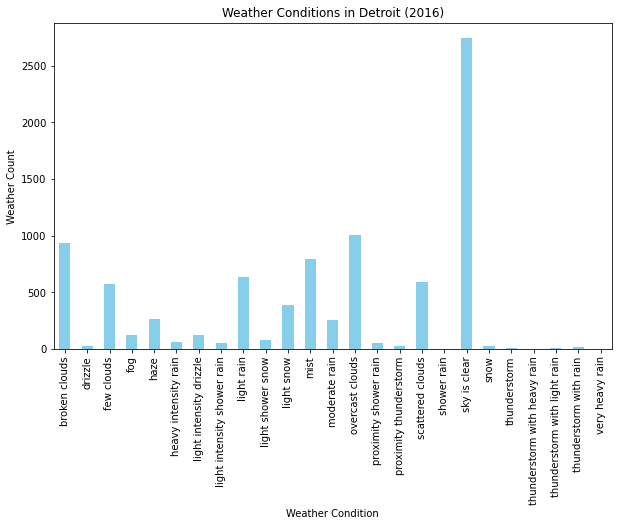

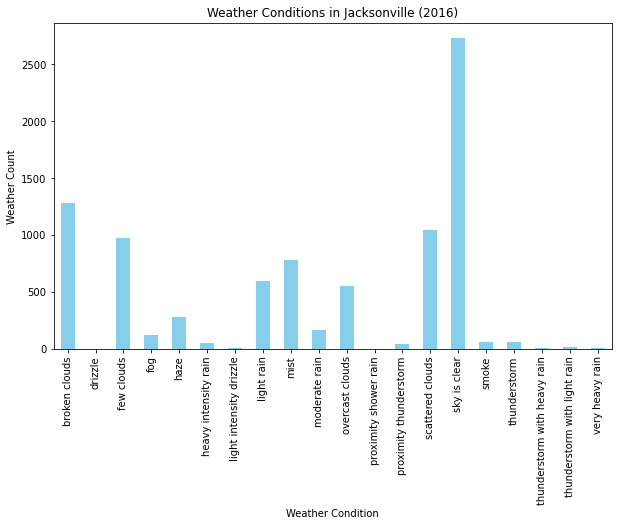

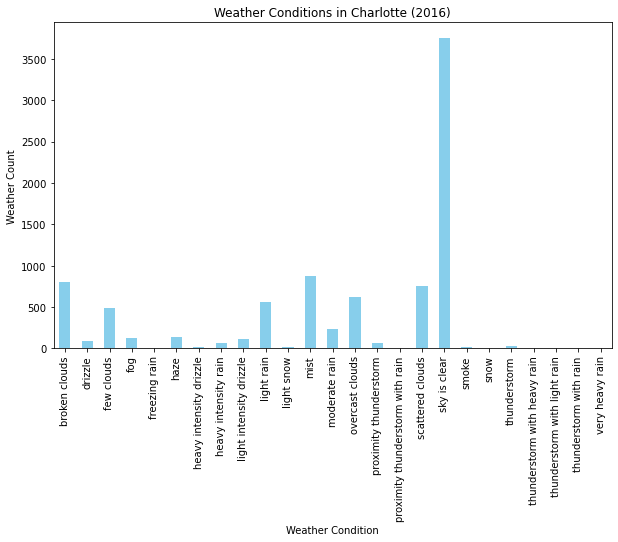

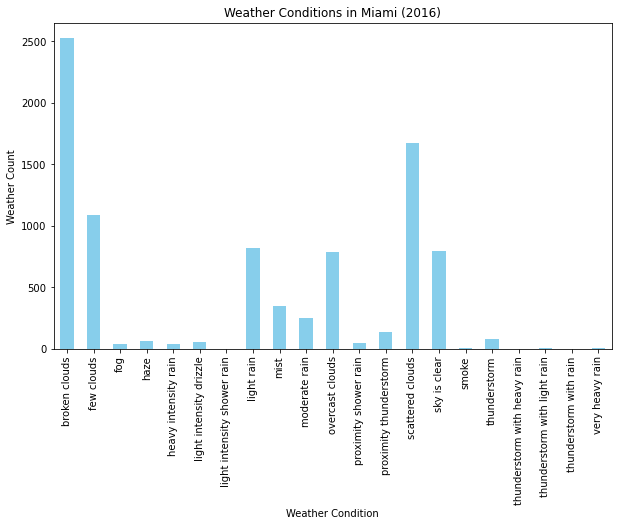

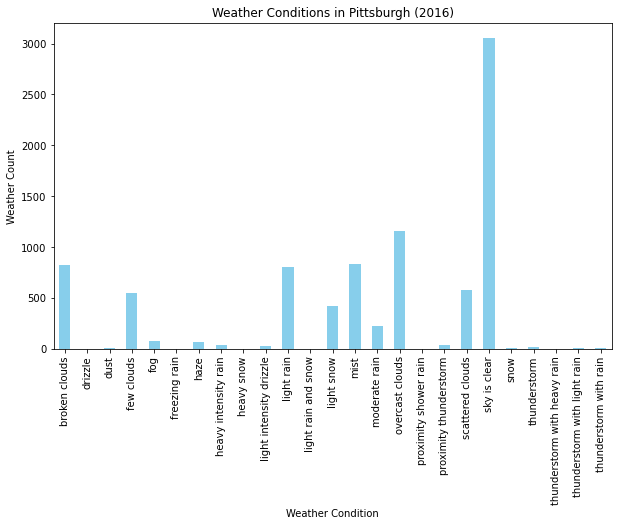

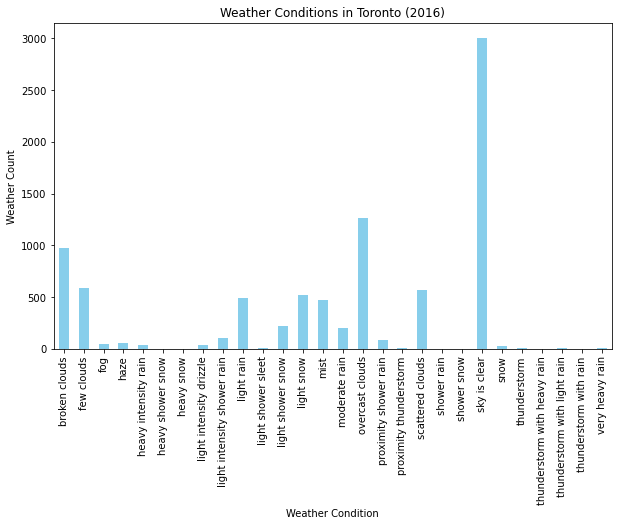

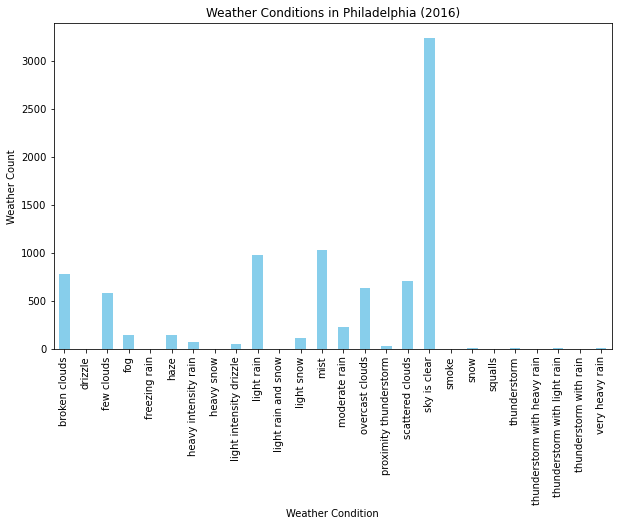

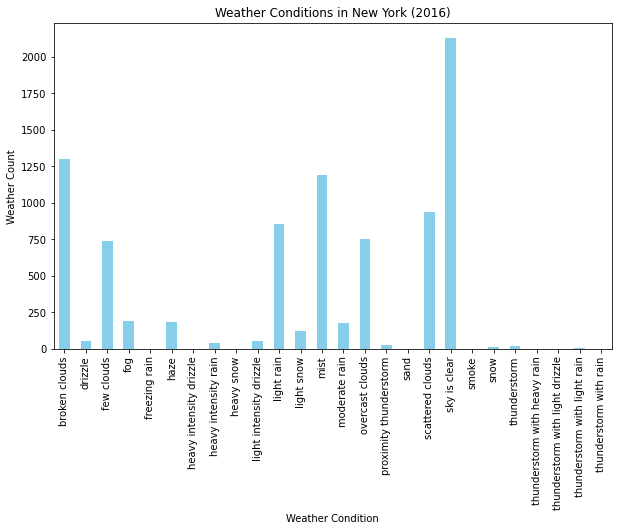

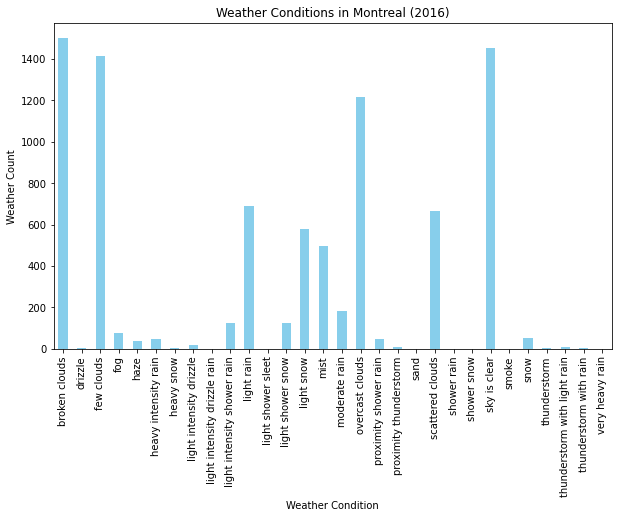

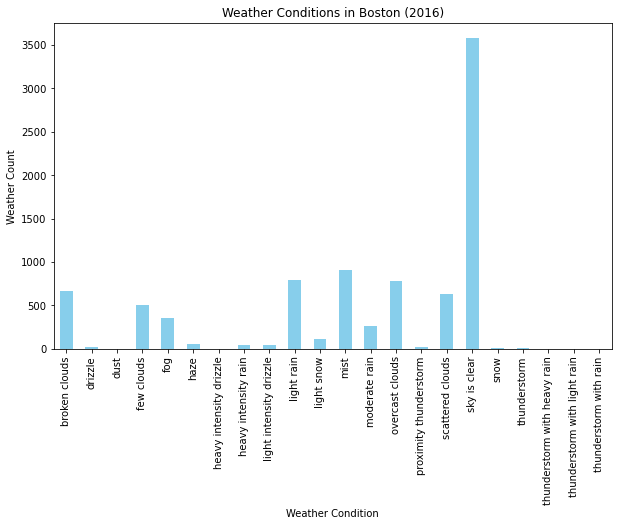

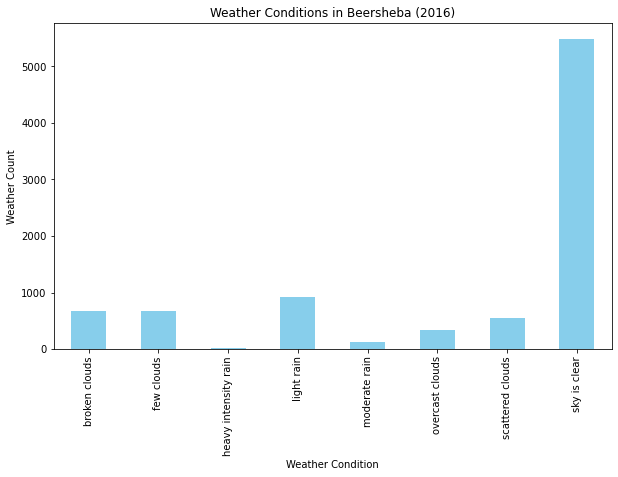

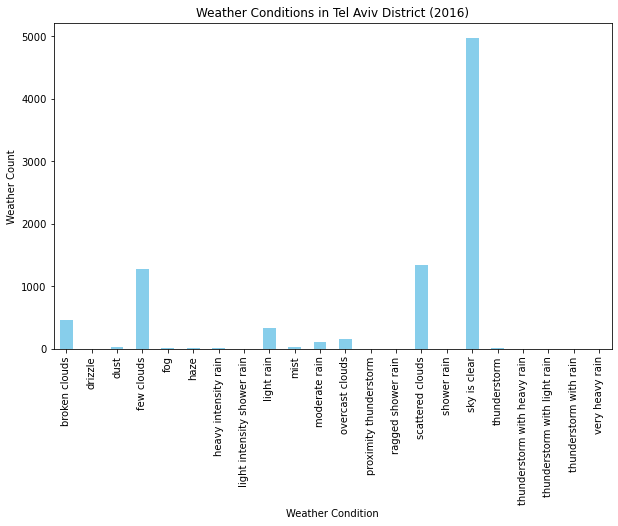

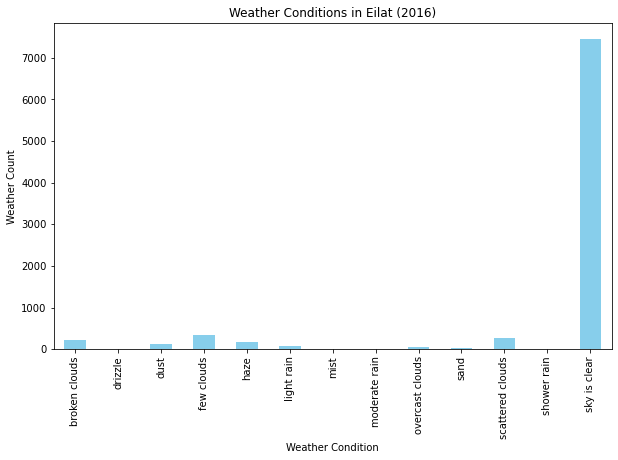

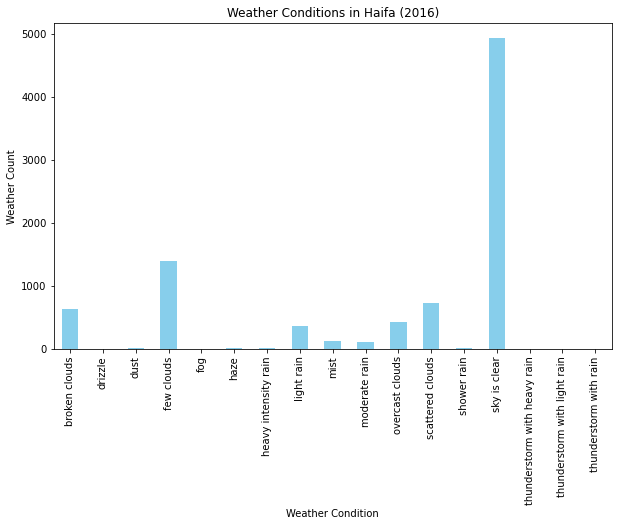

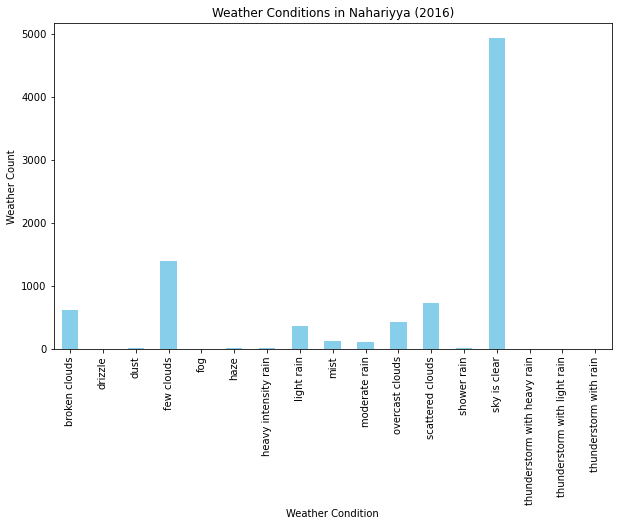

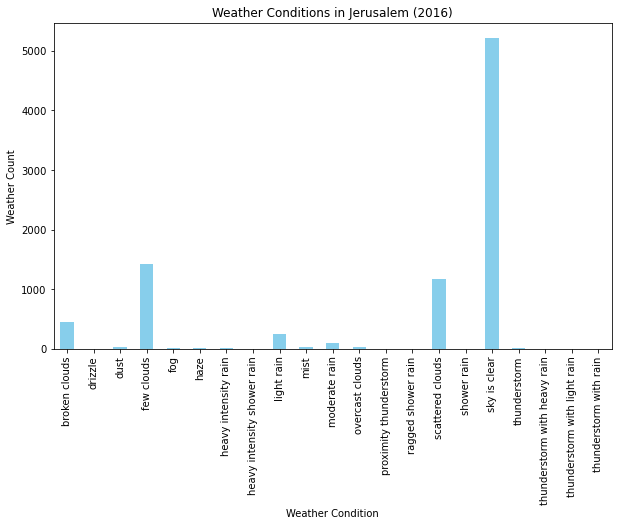

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Description of daily weather in different cities during the years 2012-2017
df = pd.read_csv("../data/weather_description.csv")

# Do analysis with years between 2012 and 2017
def get_year(year):
    year_df = df[df['datetime'].str.contains(year)]
    return year_df

year = "2016"
df_year = get_year(year)

city_names = df_year.columns.to_list()[1:]

# Create an empty dictionary to store city weather counts
city_counts = {}
# Calculate counts for each weather condition for each city
for city in city_names:
    city_counts[city] = df_year.groupby(city).size()
count_data = pd.DataFrame(city_counts)

# For each city, create a bar graph --> will take about 10 seconds to run because it is making multiple graphs. Could index "count_data.colums" to get less graphs
for city in count_data.columns:
    # do not inclue the rows with NaN in graphs
    city_data = count_data[[city]].dropna()
    plt.figure(figsize=(10, 6))
    # Make bar graph with labels
    city_data[city].plot(kind='bar', color='skyblue')
    plt.xlabel('Weather Condition')
    plt.ylabel('Weather Count')
    plt.title(f'Weather Conditions in {city} ({year})')
    plt.xticks(rotation=90)
    plt.show()